# COMP2200 Data science group project - Group 50

#### Malaria and the Factors Affecting its Spread

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [3]:
malaria = pd.read_csv("files/malaria_data")
malaria.head()

,Country,Year,Cases,Deaths,CasesMedian,CasesMin,CasesMax,DeathsMedian,DeathsMin,DeathsMax,WHORegion
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
1,Algeria,2017,0,0,0,NaN,NaN,0,NaN,NaN,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
3,Argentina,2017,0,0,0,NaN,NaN,0,NaN,NaN,Americas
4,Armenia,2017,0,0,0,NaN,NaN,0,NaN,NaN,Europe


In [3]:
avg_temp = pd.read_csv("files/average_yearly_temperature.csv")
avg_temp.head()

,Unnamed: 0,Country name,Average yearly temperature (° C),Unnamed: 3
0,1,Aruba,25.35,NaN
1,2,Andorra,7.60,NaN
2,3,Afghanistan,12.60,NaN
3,4,Angola,21.55,NaN
4,5,Albania,11.40,NaN


In [4]:
Life_Expect = pd.read_csv("files/HDI.csv")
Life_Expect.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,61.553,62.054,62.525,62.966,63.377,63.763,64.13
1,Albania,76.914,77.252,77.554,77.813,78.025,78.194,78.333
2,Algeria,75.199,75.436,75.661,75.878,76.090,76.298,76.499
3,Angola,56.33,57.236,58.054,58.776,59.398,59.925,60.379
4,Antigua and Barbuda,75.956,76.087,76.218,76.349,76.483,76.617,76.752


In [5]:
GDP = pd.read_csv("files/GDP Per Capita.csv")
GDP.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,24985.013920,24712.493260,26441.619940,26893.011510,28396.908420,28452.170610,29350.805020,30253.279360,NaN,NaN
1,Africa Eastern and Southern,1686.695763,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473,1534.171767,1485.307425,1330.140232
2,Afghanistan,591.162798,641.871438,637.165464,613.856505,578.466353,509.220101,519.888913,493.756581,507.103392,508.808409
3,Africa Western and Central,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800
4,Angola,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869


### Data cleaning

In [6]:
#Remove any NaN and infinite values from malaria table
malaria.replace([np.inf, -np.inf], np.nan, inplace=True)
malaria.dropna(inplace=True)
malaria.head()

,Country,Year,Cases,Deaths,CasesMedian,CasesMin,CasesMax,DeathsMedian,DeathsMin,DeathsMax,WHORegion
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
6,Bangladesh,2017,32924[30000-36000],76[3-130],32924,30000.0,36000.0,76,3.0,130.0,South-East Asia
8,Benin,2017,4111699[2774000-6552000],7328[5740-8920],4111699,2774000.0,6552000.0,7328,5740.0,8920.0,Africa
10,Bolivia (Plurinational State of),2017,6512[4900-8300],2[0-4],6512,4900.0,8300.0,2,0.0,4.0,Americas


In [7]:
#Remove unnecessary columns from average temperature table
avg_temp = avg_temp.drop(columns=['Unnamed: 0', 'Unnamed: 3'])
avg_temp.head()

,Country name,Average yearly temperature (° C)
0,Aruba,25.35
1,Andorra,7.60
2,Afghanistan,12.60
3,Angola,21.55
4,Albania,11.40


In [8]:
#Remove any NaN/infinite values
Life_Expect.drop(list(Life_Expect.filter(regex = 'Unnamed')), axis = 1, inplace = True)
Life_Expect.replace([np.inf, -np.inf], np.nan, inplace=True)
Life_Expect.dropna(inplace=True)
Life_Expect.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,61.553,62.054,62.525,62.966,63.377,63.763,64.13
1,Albania,76.914,77.252,77.554,77.813,78.025,78.194,78.333
2,Algeria,75.199,75.436,75.661,75.878,76.090,76.298,76.499
3,Angola,56.33,57.236,58.054,58.776,59.398,59.925,60.379
4,Antigua and Barbuda,75.956,76.087,76.218,76.349,76.483,76.617,76.752


In [9]:
#Remove unnecessary columns (irrelevant years) and NaN/infinite values
GDP = GDP.drop(columns=['2018', '2019', '2020'])
GDP.replace([np.inf, -np.inf], np.nan, inplace=True)
GDP.dropna(inplace=True)
GDP.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017
0,Aruba,24985.013920,24712.493260,26441.619940,26893.011510,28396.908420,28452.170610,29350.805020
1,Africa Eastern and Southern,1686.695763,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473
2,Afghanistan,591.162798,641.871438,637.165464,613.856505,578.466353,509.220101,519.888913
3,Africa Western and Central,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332
4,Angola,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057


#### Removing Outliers

#### Checking For outliers

[Text(0.5, 1.0, 'Median Number of Cases BoxPlot - Tens of Millions')]

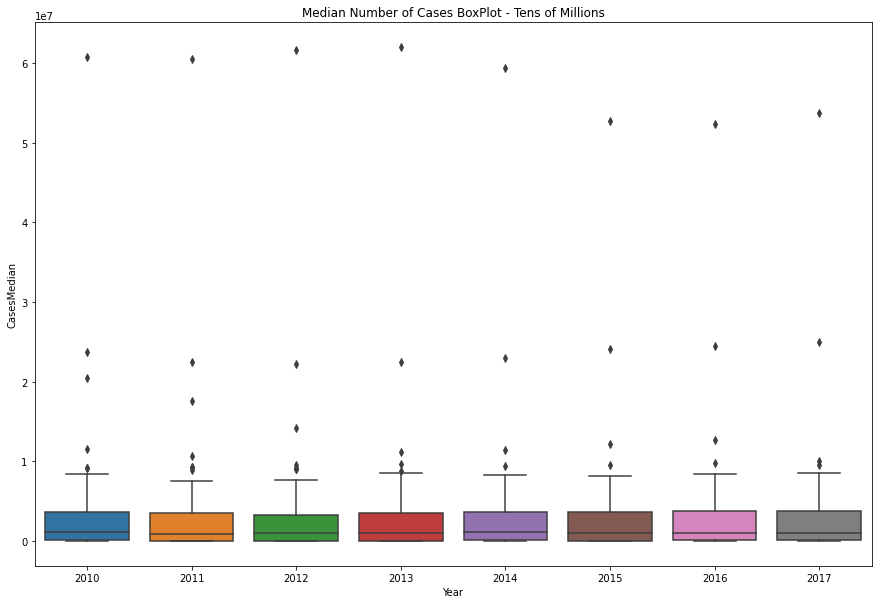

In [10]:
f, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(x = "Year", y = "CasesMedian", data = malaria).set(title = 'Median Number of Cases BoxPlot - Tens of Millions')

In [11]:
M2014 = malaria[malaria['Year'] == 2014]
columns = ['Country', 'CasesMedian', 'WHORegion']
print(M2014[columns][(M2014['CasesMedian'] > 10000000)])

                              Country  CasesMedian        WHORegion
348  Democratic Republic of the Congo     23031390           Africa
368                             India     11420000  South-East Asia
390                           Nigeria     59365039           Africa


[Text(0.5, 1.0, 'Median Number of Deaths BoxPlot')]

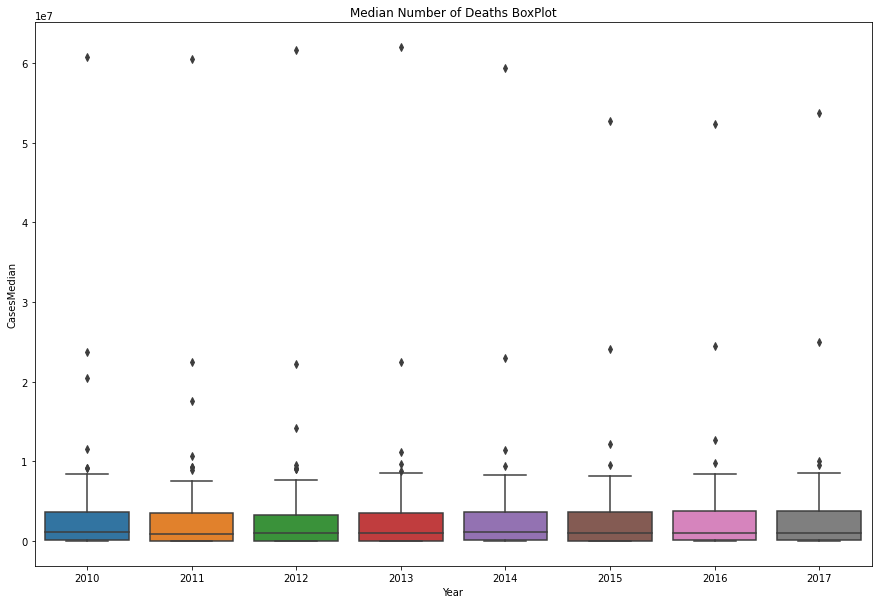

In [12]:
f, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(x = "Year", y = "CasesMedian", data = malaria).set(title = 'Median Number of Deaths BoxPlot')

#### Analysis of outliers

The box plots above highlight the spread of the median number of cases and median number of deaths per year in different countries respectively. This is to check for any outliers if there are any. The outliers from the different years are not genuine outliers which need to be removed as those are highlighting the cases within hotspots meaning that, that data is necessary for the analysis. This is further reinforced by the lack of volatility of the outliers from year to year. The same can be said for the box plots for the median number of deaths from year to year. The outliers highlight the deaths in the hotspots and there is no volatility from year to year hence there are no outliers to remove!

##### Combining Data

In [13]:
avg_temp = avg_temp.rename(columns = {'Country name' : 'Country'})
avg_temp

,Country,Average yearly temperature (° C)
0,Aruba,25.35
1,Andorra,7.60
2,Afghanistan,12.60
3,Angola,21.55
4,Albania,11.40
...,...,...
206,"Yemen, Rep.",23.85
207,South Africa,17.75
208,"Congo, Dem. Rep.",24.00
209,Zambia,21.40


In [14]:
Life_Expect = Life_Expect.rename(columns = {'Country Name' : 'Country'})
Life_Expect

,Country,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,61.553,62.054000,62.525,62.966000,63.377000,63.763000,64.13
1,Albania,76.914,77.252000,77.554,77.813000,78.025000,78.194000,78.333
2,Algeria,75.199,75.436000,75.661,75.878000,76.090000,76.298000,76.499
3,Angola,56.33,57.236000,58.054,58.776000,59.398000,59.925000,60.379
4,Antigua and Barbuda,75.956,76.087000,76.218,76.349000,76.483000,76.617000,76.752
...,...,...,...,...,...,...,...,...
196,Virgin Islands (U.S.),78.31707317,78.517073,78.71707317,78.868293,79.017073,79.168293,79.36829268
197,West Bank and Gaza,72.915,73.041000,73.17,73.303000,73.442000,73.589000,73.74
198,"Yemen, Rep.",65.768,65.920000,66.016,66.066000,66.085000,66.087000,66.086
199,Zambia,57.126,58.502000,59.746,60.831000,61.737000,62.464000,63.043


In [15]:
Life_Expect_2011 = Life_Expect[["Country", "2011"]]
Life_Expect_2012 = Life_Expect[["Country", "2012"]]
Life_Expect_2013 = Life_Expect[["Country", "2013"]]
Life_Expect_2014 = Life_Expect[["Country", "2014"]]
Life_Expect_2015 = Life_Expect[["Country", "2015"]]
Life_Expect_2016 = Life_Expect[["Country", "2016"]]
Life_Expect_2017 = Life_Expect[["Country", "2017"]]

In [16]:
GDP = GDP.rename(columns={'Country Name' : 'Country'})
GDP

,Country,2011,2012,2013,2014,2015,2016,2017
0,Aruba,24985.013920,24712.493260,26441.619940,26893.011510,28396.908420,28452.170610,29350.805020
1,Africa Eastern and Southern,1686.695763,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473
2,Afghanistan,591.162798,641.871438,637.165464,613.856505,578.466353,509.220101,519.888913
3,Africa Western and Central,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332
4,Angola,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057
...,...,...,...,...,...,...,...,...
261,Kosovo,3741.875052,3596.804655,3891.266363,4080.330717,3603.025501,3780.003689,4045.614209
262,"Yemen, Rep.",1374.621401,1446.536472,1607.152173,1674.002572,1601.830063,1138.603723,960.528848
263,South Africa,8007.476439,7501.661096,6832.725546,6433.400402,5734.633422,5272.543648,6131.479450
264,Zambia,1672.907535,1763.069442,1878.346811,1762.427817,1338.290927,1280.806543,1535.196574


In [17]:
GDP_2011 = GDP[["Country", "2011"]]
GDP_2012 = GDP[["Country", "2012"]]
GDP_2013 = GDP[["Country", "2013"]]
GDP_2014 = GDP[["Country", "2014"]]
GDP_2015 = GDP[["Country", "2015"]]
GDP_2016 = GDP[["Country", "2016"]]
GDP_2017 = GDP[["Country", "2017"]]

In [18]:
new_malaria = malaria.drop(columns=['Cases', 'Deaths', 'CasesMin', 'CasesMax', 'DeathsMin', 'DeathsMax'])

In [19]:
new_malaria.head()

,Country,Year,CasesMedian,DeathsMedian,WHORegion
0,Afghanistan,2017,630308,298,Eastern Mediterranean
2,Angola,2017,4615605,13316,Africa
6,Bangladesh,2017,32924,76,South-East Asia
8,Benin,2017,4111699,7328,Africa
10,Bolivia (Plurinational State of),2017,6512,2,Americas


In [20]:
M2010 = new_malaria[new_malaria["Year"] == 2010]
M2011 = new_malaria[new_malaria["Year"] == 2011]
M2012 = new_malaria[new_malaria["Year"] == 2012]
M2013 = new_malaria[new_malaria["Year"] == 2013]
M2014 = new_malaria[new_malaria["Year"] == 2014]
M2015 = new_malaria[new_malaria["Year"] == 2015]
M2016 = new_malaria[new_malaria["Year"] == 2016]
M2017 = new_malaria[new_malaria["Year"] == 2017]

In [21]:
new_malaria = M2010

In [22]:
new_malaria.head()

,Country,Year,CasesMedian,DeathsMedian,WHORegion
749,Afghanistan,2010,353343,200,Eastern Mediterranean
751,Angola,2010,3125901,13351,Africa
755,Bangladesh,2010,113895,274,South-East Asia
757,Benin,2010,3713395,8273,Africa
759,Bolivia (Plurinational State of),2010,19614,11,Americas


In [23]:
# M2010 = M2010.drop(columns=['Year', 'WHORegion'])
M2011 = M2011.drop(columns=['Year', 'WHORegion'])
M2012 = M2012.drop(columns=['Year', 'WHORegion'])
M2013 = M2013.drop(columns=['Year', 'WHORegion'])
M2014 = M2014.drop(columns=['Year', 'WHORegion'])
M2015 = M2015.drop(columns=['Year', 'WHORegion'])
M2016 = M2016.drop(columns=['Year', 'WHORegion'])
M2017 = M2017.drop(columns=['Year', 'WHORegion'])

In [24]:
new_malaria = new_malaria.drop(columns=['Year', 'CasesMedian', 'DeathsMedian'])

In [25]:
new_malaria = pd.merge(new_malaria, avg_temp, on='Country')
new_malaria = pd.merge(new_malaria, M2011, on='Country')
new_malaria = pd.merge(new_malaria, Life_Expect_2011, on='Country')
new_malaria = new_malaria.rename(columns = {'CasesMedian' : 'MedianCases_2011', 'DeathsMedian' : 'MedianDeaths_2011', '2011' : 'Life_Expectancy_2011'})
new_malaria = pd.merge(new_malaria, GDP_2011, on='Country')
new_malaria = new_malaria.rename(columns={'2011' : 'GDP_2011'})

In [26]:
new_malaria = pd.merge(new_malaria, M2012, on='Country')
new_malaria = pd.merge(new_malaria, Life_Expect_2012, on='Country')
new_malaria = new_malaria.rename(columns = {'CasesMedian' : 'MedianCases_2012', 'DeathsMedian' : 'MedianDeaths_2012', '2012' : 'Life_Expectancy_2012'})
new_malaria = pd.merge(new_malaria, GDP_2012, on='Country')
new_malaria = new_malaria.rename(columns={'2012' : 'GDP_2012'})

In [27]:
new_malaria = pd.merge(new_malaria, M2013, on='Country')
new_malaria = pd.merge(new_malaria, Life_Expect_2013, on='Country')
new_malaria = new_malaria.rename(columns = {'CasesMedian' : 'MedianCases_2013', 'DeathsMedian' : 'MedianDeaths_2013', '2013' : 'Life_Expectancy_2013'})
new_malaria = pd.merge(new_malaria, GDP_2013, on='Country')
new_malaria = new_malaria.rename(columns={'2013' : 'GDP_2013'})

In [28]:
new_malaria = pd.merge(new_malaria, M2014, on='Country')
new_malaria = pd.merge(new_malaria, Life_Expect_2014, on='Country')
new_malaria = new_malaria.rename(columns = {'CasesMedian' : 'MedianCases_2014', 'DeathsMedian' : 'MedianDeaths_2014', '2014' : 'Life_Expectancy_2014'})
new_malaria = pd.merge(new_malaria, GDP_2014, on='Country')
new_malaria = new_malaria.rename(columns={'2014' : 'GDP_2014'})

In [29]:
new_malaria = pd.merge(new_malaria, M2015, on='Country')
new_malaria = pd.merge(new_malaria, Life_Expect_2015, on='Country')
new_malaria = new_malaria.rename(columns = {'CasesMedian' : 'MedianCases_2015', 'DeathsMedian' : 'MedianDeaths_2015', '2015' : 'Life_Expectancy_2015'})
new_malaria = pd.merge(new_malaria, GDP_2015, on='Country')
new_malaria = new_malaria.rename(columns={'2015' : 'GDP_2015'})

In [30]:
new_malaria = pd.merge(new_malaria, M2016, on='Country')
new_malaria = pd.merge(new_malaria, Life_Expect_2016, on='Country')
new_malaria = new_malaria.rename(columns = {'CasesMedian' : 'MedianCases_2016', 'DeathsMedian' : 'MedianDeaths_2016', '2016' : 'Life_Expectancy_2016'})
new_malaria = pd.merge(new_malaria, GDP_2016, on='Country')
new_malaria = new_malaria.rename(columns={'2016' : 'GDP_2016'})

In [31]:
new_malaria = pd.merge(new_malaria, M2017, on='Country')
new_malaria = pd.merge(new_malaria, Life_Expect_2017, on='Country')
new_malaria = new_malaria.rename(columns = {'CasesMedian' : 'MedianCases_2017', 'DeathsMedian' : 'MedianDeaths_2017', '2017' : 'Life_Expectancy_2017'})
new_malaria = pd.merge(new_malaria, GDP_2017, on='Country')
new_malaria = new_malaria.rename(columns={'2017' : 'GDP_2017'})

In [32]:
new_malaria

,Country,WHORegion,Average yearly temperature (° C),MedianCases_2011,MedianDeaths_2011,Life_Expectancy_2011,GDP_2011,MedianCases_2012,MedianDeaths_2012,Life_Expectancy_2012,...,Life_Expectancy_2015,GDP_2015,MedianCases_2016,MedianDeaths_2016,Life_Expectancy_2016,GDP_2016,MedianCases_2017,MedianDeaths_2017,Life_Expectancy_2017,GDP_2017
0,Afghanistan,Eastern Mediterranean,12.60,454823,242,61.553,591.162798,278223,117,62.054,...,63.377,578.466353,614491,294,63.763,509.220101,630308,298,64.13,519.888913
1,Angola,Africa,21.55,3040461,12763,56.33,4615.468219,3111760,12437,57.236,...,59.398,4166.979833,4485050,13197,59.925,3506.073128,4615605,13316,60.379,4095.810057
2,Bangladesh,South-East Asia,25.00,102302,250,70.256,861.762162,35333,87,70.606,...,71.514,1248.453310,31169,73,71.785,1401.564635,32924,76,72.052,1563.767819
3,Benin,Africa,27.55,3515943,7554,59.59,1130.273190,3307673,6940,59.842,...,60.608,1076.796702,4007210,7137,60.885,1087.287304,4111699,7328,61.174,1136.593970
4,Botswana,Africa,21.50,678,1,61.91,7617.310041,302,0,63.511,...,67.338,6799.870178,1150,2,68.178,7243.933974,2989,7,68.812,7893.418671
5,Burkina Faso,Africa,28.25,9320362,40873,57.761,751.172770,9228345,37028,58.374,...,59.919,653.327268,7675183,28453,60.354,688.250696,7907562,27791,60.768,734.996268
6,Burundi,Africa,19.80,1546912,4724,57.925,249.577973,1501315,4876,58.568,...,60.123,305.549646,2053294,5161,60.528,282.193029,2113066,5253,60.898,292.998010
7,Cambodia,Western Pacific,26.80,376898,657,67.043,882.275614,266576,393,67.480,...,68.637,1162.904995,127552,210,68.977,1269.591499,208273,345,69.289,1385.260066
8,Cameroon,Africa,24.60,5462230,11848,55.581,1405.094123,6168031,12301,56.073,...,57.583,1327.502561,7176158,11999,58.063,1364.329540,7307515,11566,58.511,1425.106368
9,Central African Republic,Africa,24.90,2118745,7426,47.95,551.749692,2023795,6739,48.638,...,50.881,377.422919,1780632,4998,51.593,402.191635,1804550,4804,52.24,450.900697


# Recursive Feature Elimination (RFE)

Removing unnecessary features to make a more accurate heatmap

In [33]:
from sklearn.feature_selection import RFE

# K Nearest neighbour Analysis

Which variables are the most significant in relation to the spread of malaria?

# Data Visualisation

#### Heatmaps

In [5]:
malaria.groupby('WHORegion').CasesMax.value_counts()

WHORegion        CasesMedian
Africa           0              4
                 1              3
                 7              2
                 8              1
                 22             1
                               ..
Western Pacific  1414839        1
                 1469150        1
                 1500657        1
                 1677722        1
                 1931287        1
Name: CasesMedian, Length: 712, dtype: int64

In [29]:
casesTable = (
malaria
 .groupby('WHORegion')
 .CasesMax.value_counts()
 .unstack()
 .fillna(0)
)

In [28]:
malaria.corr()

,Year,CasesMedian,CasesMin,CasesMax,DeathsMedian,DeathsMin,DeathsMax
Year,1.000000,-0.009647,-0.015314,-0.015440,-0.037769,-0.039585,-0.058521
CasesMedian,-0.009647,1.000000,0.996476,0.991216,0.969658,0.936230,0.957981
CasesMin,-0.015314,0.996476,1.000000,0.977848,0.965462,0.935296,0.945872
CasesMax,-0.015440,0.991216,0.977848,1.000000,0.958003,0.920103,0.969016
DeathsMedian,-0.037769,0.969658,0.965462,0.958003,1.000000,0.983608,0.977782
DeathsMin,-0.039585,0.936230,0.935296,0.920103,0.983608,1.000000,0.932587
DeathsMax,-0.058521,0.957981,0.945872,0.969016,0.977782,0.932587,1.000000


In [30]:
casesTable

CasesMax,40.0,160.0,170.0,400.0,430.0,460.0,470.0,620.0,660.0,730.0,...,37700000.0,38570000.0,74040000.0,74500000.0,75930000.0,81580000.0,82700000.0,83240000.0,83800000.0,84840000.0
WHORegion,,,,,,,,,,,,,,,,,,,,,
Africa,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Americas,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eastern Mediterranean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
South-East Asia,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Western Pacific,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='CasesMax', ylabel='WHORegion'>

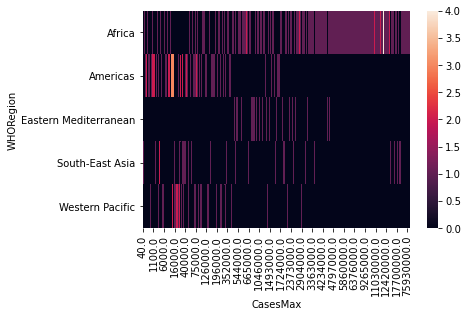

In [31]:
# plt.figure(figsize = (20,12))
sns.heatmap(casesTable)

Less significant features will need to be removed for a more accurate heatmap. This will be done by using RFE

Display infections in the region

C:\Users\bchau\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bchau\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bchau\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bchau\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bchau\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.0% of the points

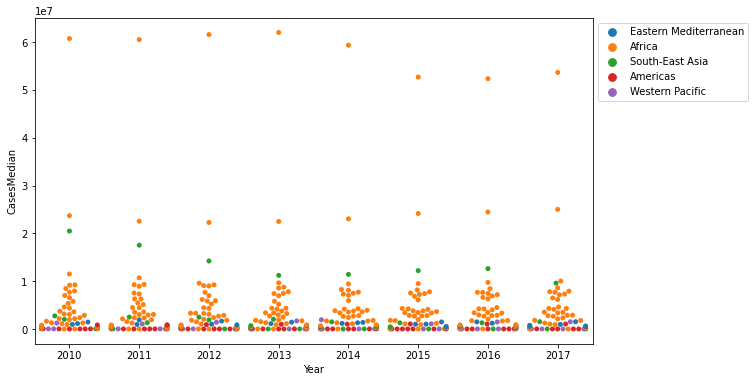

In [34]:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'Year', y = 'CasesMedian', data = malaria, hue = 'WHORegion')
plt.legend(bbox_to_anchor= (1, 1), loc = 2)

# Algorithms

Model the effectiveness of preventative measures on the prevalence of the disease